In [65]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stone-paper-scissors-hand-landmarks-dataset/data.csv


In [66]:
import pandas as pd
data=pd.read_csv("/kaggle/input/stone-paper-scissors-hand-landmarks-dataset/data.csv")
print(data)
    

            0_x       0_y       1_x       1_y       2_x       2_y       3_x  \
0      0.620448  0.616574  0.590011  0.537064  0.577106  0.442460  0.574392   
1      0.793385  0.601346  0.759365  0.550227  0.748562  0.505328  0.731791   
2      0.569872  0.368590  0.619827  0.360140  0.659398  0.314017  0.660076   
3      0.321641  0.613728  0.361642  0.560630  0.380633  0.514779  0.393544   
4      0.767176  0.946333  0.773455  0.867742  0.766660  0.783190  0.750389   
...         ...       ...       ...       ...       ...       ...       ...   
45045  0.670029  0.936610  0.715177  0.928309  0.754113  0.905691  0.789434   
45046  0.348093  0.427743  0.326069  0.343806  0.345926  0.278691  0.378217   
45047  0.357842  0.550905  0.402635  0.521997  0.424476  0.456927  0.391844   
45048  0.615218  0.797272  0.617850  0.725060  0.642048  0.681430  0.660898   
45049  0.321329  0.205087  0.278908  0.253037  0.230708  0.264388  0.204924   

            3_y       4_x       4_y  ...      16_y 

In [67]:
for i in data.columns :
    print(i)

0_x
0_y
1_x
1_y
2_x
2_y
3_x
3_y
4_x
4_y
5_x
5_y
6_x
6_y
7_x
7_y
8_x
8_y
9_x
9_y
10_x
10_y
11_x
11_y
12_x
12_y
13_x
13_y
14_x
14_y
15_x
15_y
16_x
16_y
17_x
17_y
18_x
18_y
19_x
19_y
20_x
20_y
Category


In [68]:
Y=data['Category']

print(Y)

0          Paper
1        Scissor
2          Stone
3        Scissor
4          Paper
          ...   
45045      Paper
45046      Stone
45047    Scissor
45048      Stone
45049      Stone
Name: Category, Length: 45050, dtype: object


In [69]:
total_dataset=[]
for j in data.columns:
    column_data=[]
    for i in range(len(data)):
        m=data[j][i]
        column_data.append(m)
    total_dataset.append(column_data)
        

total_dataset=np.asarray(total_dataset)
print(total_dataset.shape)

(43, 45050)


In [70]:
l=data
l=l.drop('Category',axis=1)


In [71]:
#here we add our one dimensional train data 


y_train=[]
y_test=[]  #here we defined the train and the test set 

for j in range(len(data)):
    m=data['Category'][j]
    if j<33787:
        if m=='Scissor':
            y_train.append(0)
        if m=='Stone':
            y_train.append(1)
        if m=='Paper':
            y_train.append(2)
            
    else:
        if m=='Scissor':
            y_test.append(0)
        if m=='Stone':
            y_test.append(1)
        if m=='Paper':
            y_test.append(2)
        


x_train=[]
x_test=[]
for i in range(len(data)):
    x_iterated=[]
    for j in data.columns:
        if j!='Category':
            x_iterated.append(data[j][i])
    if(i<33787):
        x_train.append(x_iterated)
    else:
        x_test.append(x_iterated)
    
#now we need to need to type cast them into the no array to fit the data to the model
x_train=np.asarray(x_train)
x_test=np.asarray(x_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)
    
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33787, 42)
(11263, 42)
(33787,)
(11263,)


In [72]:
print(x_train[43][0])

0.3712879121303558


In [73]:
print(y_train)
print(y_test)

[2 0 1 ... 1 1 1]
[1 1 1 ... 0 1 1]


In [74]:
#now here we try to define our deep neural network model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout,Input
from tensorflow.keras.models import Sequential #for using the sequential api
from keras.utils import plot_model

from keras.models import Model

#Now we create the model 
#but here we would use the functional api to create the model 
input1=Input((42,))
dense_layer1=Dense(256,activation='relu')(input1)
batchnormalization=BatchNormalization()(dense_layer1)
dense_layer2=Dense(256,activation="relu")(batchnormalization)
dense_layer3=Dense(128,activation="leaky_relu")(dense_layer2)

batchnormalization1=BatchNormalization()(dense_layer3)
dense_layer4=Dense(64,activation="relu")(batchnormalization1)
dropout_layer=Dropout(0.4)(dense_layer4)
dense_layer5=Dense(16,activation="relu")(dropout_layer)

dense_layer6=Dense(3)(dense_layer5)

dense_layer7=Dense(1)(dense_layer6)

model=Model(inputs=input1,outputs=dense_layer7)

#after creating the model we plot the model
#we need to compile the model
model.compile(optimizer="rmsprop",run_eagerly=True,loss='mse',metrics=['accuracy','precision'])

model.summary()


Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 256)            │        11,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 3)              │            51 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,583 (471.03 KB)

 Trainable params: 119,815 (468.03 KB)

 Non-trainable params: 768 (3.00 KB)

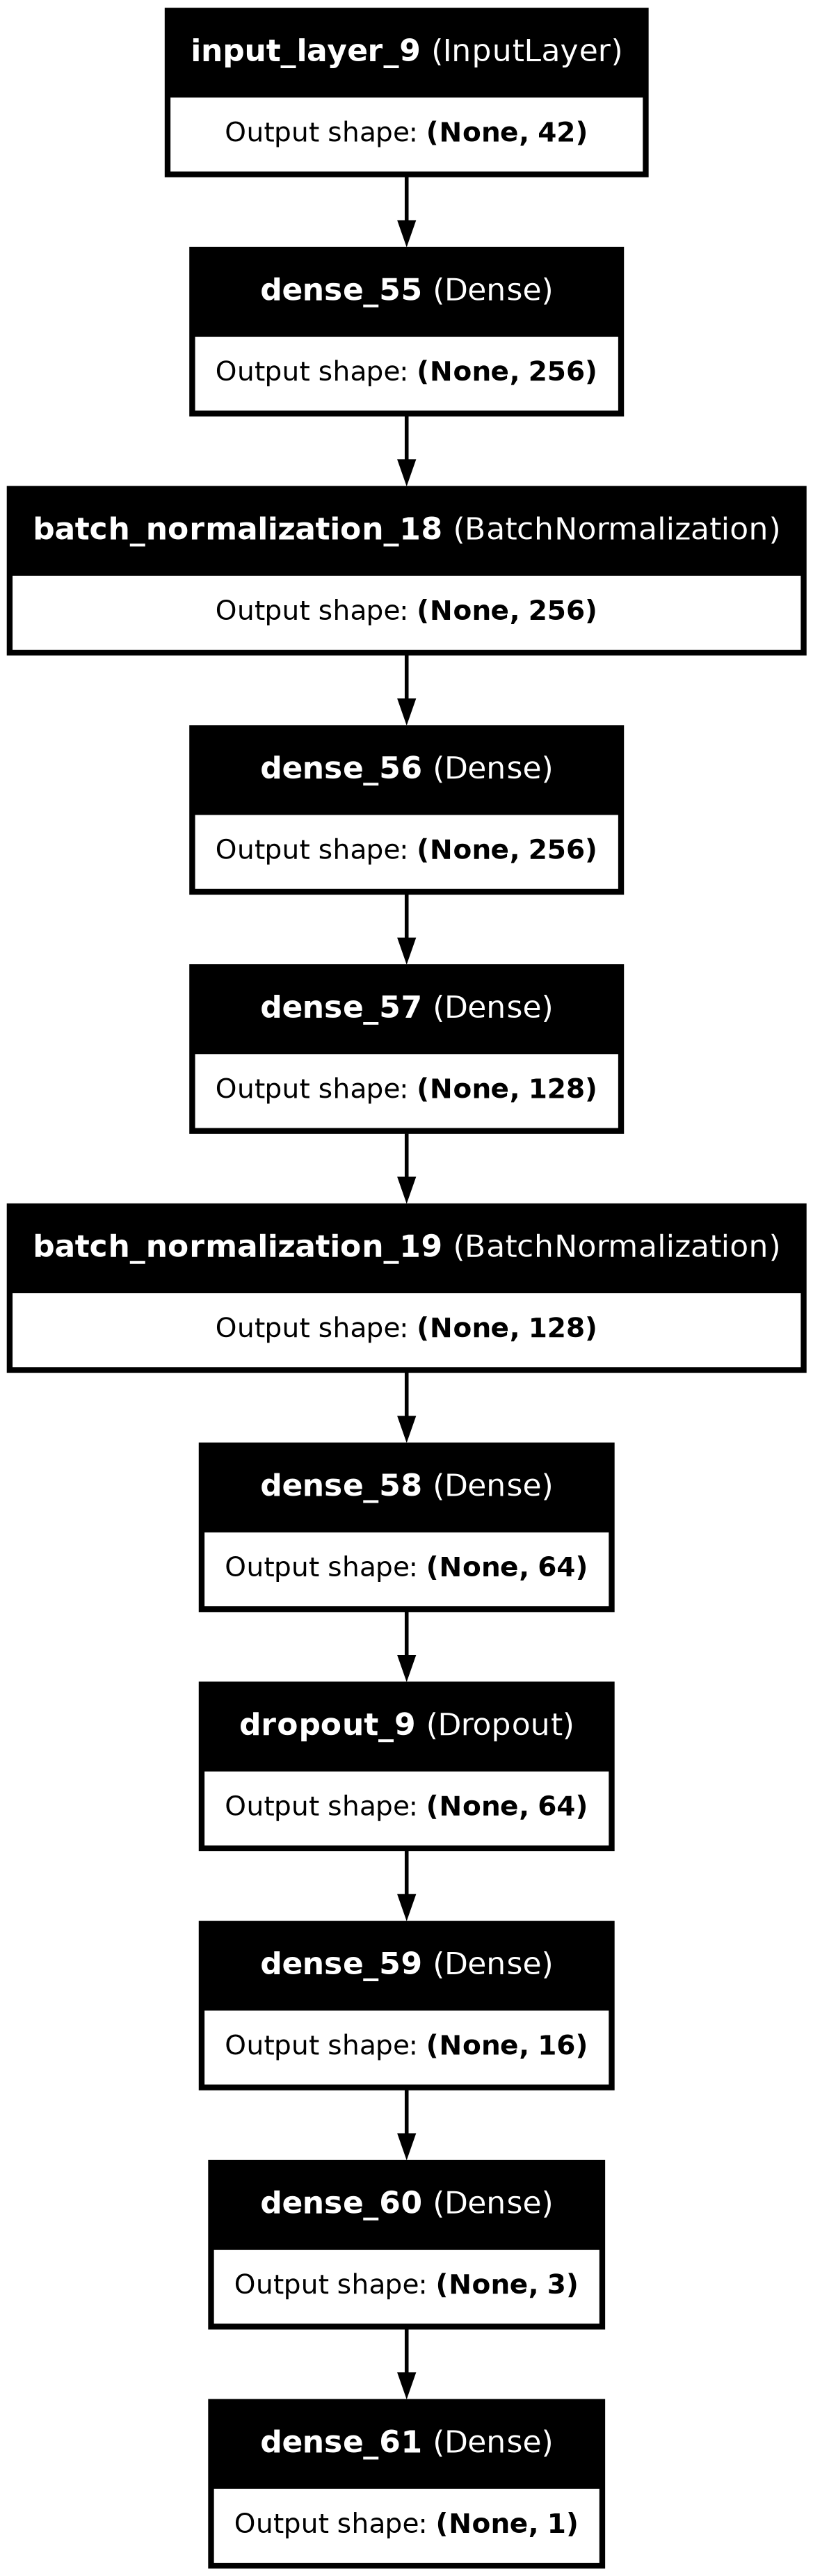

In [75]:
plot_model(model,show_shapes=True,show_layer_names=True)


In [79]:
# #now we also need to one hot encode the vector 
# from keras.utils import to_categorical
# y_train=to_categorical(y_train)


#now after making the model and then compiling the model , we would need to fir the data to the model
history=model.fit(x_train,y_train,verbose=1,batch_size=96,epochs=10)



Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 34s 95ms/step - accuracy: 0.6479 - loss: 0.0390 - precision: 0.9773
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 41s 95ms/step - accuracy: 0.6507 - loss: 0.0356 - precision: 0.9800
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 33s 95ms/step - accuracy: 0.6518 - loss: 0.0331 - precision: 0.9816
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 33s 94ms/step - accuracy: 0.6546 - loss: 0.0387 - precision: 0.9786
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 33s 94ms/step - accuracy: 0.6528 - loss: 0.0337 - precision: 0.9812
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 33s 94ms/step - accuracy: 0.6491 - loss: 0.0335 - precision: 0.9808
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 33s 95ms/step - accuracy: 0.6503 - loss: 0.0307 - precision: 0.9830
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 33s 94ms/step - accuracy: 0.6526 - loss: 0.0333 - precision: 0.9807
Epoch 9/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 33s 95ms/step - accuracy: 0.6549 - loss: 0.0354 - precision: 0.9814
Epoch 10/10
352/352 ━━━━━━━━

In [80]:
model.evaluate(x_test,y_test,verbose=1)


352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.5716 - loss: 0.2643 - precision: 0.9885


[0.2532910108566284, 0.573026716709137, 0.9903256893157959]

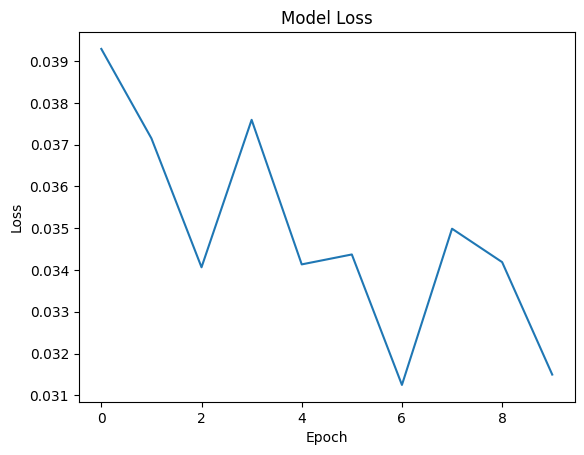

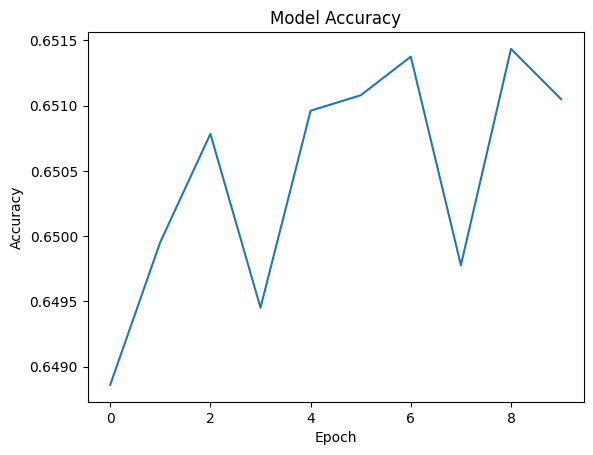

In [81]:
import matplotlib.pyplot as plt


# Plot training loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
